# Visualisation du cap, de la gîte et du tangage
Le pilote automatique a été monté sur l'arpège (voilier 9m),
ce pilote a maintenu le cap pendant une heure et a permis à de faire route vers le Nord dans une mer "formée".
Il a fallu corriger au début pour l'ajuster puis pour éviter le plateau des Duons et passer à l'Est de Pot de Fer.
La mer était agitée avec une houle courte et le vent était de travers, bâbord amure (venant de la gauche).
Les mouvements de roulis, tangage et lacet étaient significatifs.
Malgré la houle le cap a été maintenu près de la consigne et l'arpège marchait bien.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import mplcursors  # Pour les annotations interactives
import ipywidgets as widgets
from ipywidgets import interact

df = pd.read_csv("../data/processed/premier_att.csv")
df.describe()

,instant,heading,roll,pitch
count,37542.000000,37542.000000,37542.000000,37542.000000
mean,1874.861057,2.018224,-0.093317,-0.048261
std,1082.529426,0.146773,0.085256,0.048722
min,0.001000,1.017851,-0.527905,-0.765661
25%,937.434000,1.937605,-0.145529,-0.080684
50%,1874.770000,2.012085,-0.090702,-0.047684
75%,2812.303750,2.112092,-0.037389,-0.014453
max,3749.894000,2.789544,0.743943,0.153399


# Conversion d'angles
Nous avons l'habitude d'exprimer les angles en degrés, cependant toutes les fonction mathématiques et le calcul symbolique (les fameuses "formules") utilisent des angles en radians. Tous les code utilisent ces radians, les conversion en degrés sont faites avant l'affichage.

In [2]:

df["heading_deg"]  =  - (df["heading"] * (180. / np.pi) ) + 90
df["roll_deg"]  = df["roll"] * (180. / np.pi)
df["pitch_deg"]  = df["pitch"] * (180. / np.pi)


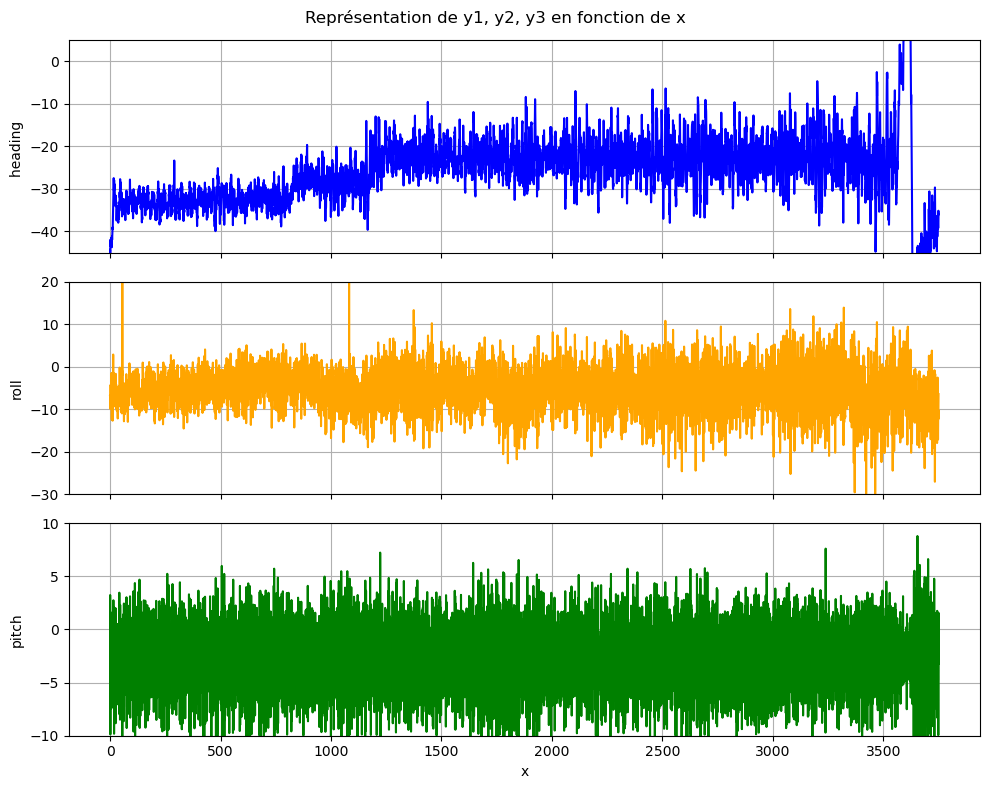

In [3]:
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Tracer y1
axes[0].plot(df["instant"], df["heading_deg"], label="heading (degrés)",  color="blue")
axes[0].set_ylabel("heading ")
axes[0].set_ylim(-45, +5)
axes[0].grid(True)

# Tracer y2
axes[1].plot(df["instant"], df["roll_deg"], label="roll (degrés)",  color="orange")
axes[1].set_ylabel("roll")
axes[1].set_ylim(-30,20)
axes[1].grid(True)

# Tracer y3
axes[2].plot(df["instant"], df["pitch_deg"], label="pitch (degrés)", color="green")
axes[2].set_ylabel("pitch")
axes[2].set_xlabel("x")
axes[2].set_ylim(-10,10)
axes[2].grid(True)

# Titre global
fig.suptitle("Représentation de y1, y2, y3 en fonction de x")
plt.tight_layout()
plt.show()

In [4]:
@interact(
    plage_x=widgets.FloatRangeSlider(
        min=df["instant"].min(),
        max=df["instant"].max(),
        step=10,
        value=[df["instant"].min(), df["instant"].max()],
        description="Plage de x:",
        layout=widgets.Layout(width="100%")  # Largeur maximale
    )
)
def tracer_portion(plage_x):
    x_min, x_max = plage_x
    df_plage = df[(df["instant"] >= x_min) & (df["instant"] <= x_max)]

    # Nombre de points dans le signal
    n = df_plage.shape[0]

    # Calcul de la FFT
    fft_heading = np.fft.fft(df_plage["heading"])

    # Fréquences associées (axe x du spectre)
    duree_plage = df_plage["instant"].max() - df_plage["instant"].min()
    freqs = np.fft.fftfreq(n, duree_plage / n)  # `d` = intervalle entre deux échantillons

    # On ne garde que les fréquences positives (spectre unilatéral)
    half_n = n // 2
    positive_freqs = freqs[:half_n]
    positive_fft = np.abs(fft_heading)[:half_n]  # Module de la FFT

    
    fig, axes = plt.subplots(3, 1, figsize=(12, 6), sharex=True)

    # Tracer le cap
    axes[0].plot(df_plage["instant"], df_plage["heading_deg"], label="heading (degrés)",  color="blue")
    axes[0].set_ylabel("cap ")
    axes[0].set_ylim(-45, +5)
    axes[0].grid(True)

    # Tracer le roulis
    axes[1].plot(df_plage["instant"], df_plage["roll_deg"], label="roll (degrés)",  color="orange")
    axes[1].set_ylabel("roulis")
    axes[1].set_ylim(-30,20)
    axes[1].grid(True)

    # Tracer le tangage
    axes[2].plot(df_plage["instant"], df_plage["pitch_deg"], label="pitch (degrés)", color="green")
    axes[2].set_ylabel("tangage")
    axes[2].set_xlabel("x")
    axes[2].set_ylim(-15,15)
    axes[2].grid(True)

    #axes[3].plot(positive_freqs, positive_fft, color="blue", linewidth=1)
    #axes[3].set_xlabel("Fréquence (Hz)")
    #axes[3].set_ylabel("Amplitude")
    #axes[3].set_title("Spectre de fréquence (FFT)")
    #axes[3].grid(True)
    #axes[3].xlim(0, 20)  # Limite l'axe x pour voir les basses fréquences
    
    # Titre global
    fig.suptitle("Cap, roulis et tangage au cours du temps")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 3))
    plt.plot(positive_freqs, positive_fft, color="blue", linewidth=1)
    plt.xlabel("Fréquence (Hz)")
    plt.ylabel("Amplitude")
    plt.title("Spectre de fréquence (FFT) du cap")
    plt.ylim(0,100)
    plt.grid(True)
    
    # Ajout du curseur interactif
    #cursor = mplcursors.cursor(hover=True)  # `hover=True` pour afficher au survol
    #cursor.connect(
    #    "add", lambda sel: sel.annotation.set_text(
    #        f"Fréquence: {sel.target[0]:.2f} Hz\nAmplitude: {sel.target[1]:.2f}"
    #    )
    #)
    plt.xlim(0, 0.2)  # Limite l'axe x pour voir les basses fréquences
    plt.show()

    matcorr = df_plage[["heading", "roll", "pitch"]].corr()

    matcorr = matcorr.rename(
        columns={
            "heading": "Cap",
            "roll": "Roulis",
            "pitch": "Tangage",
        },
        index={
            "heading": "Cap",
            "roll": "Roulis",
            "pitch": "Tangage",
            }
        )
        
    print (matcorr)

    # Créer le heatmap
    plt.figure(figsize=(4, 4))
    sns.heatmap(
        matcorr,
        annot=True,  # Affiche les valeurs dans les cases
        cmap="coolwarm",  # Palette de couleurs
        center=0,  # Centre la palette sur 0
        vmin=-1,  # Valeur minimale de la palette
        vmax=1,   # Valeur maximale de la palette
    )
    plt.title("Matrice de corrélation")
    plt.show()

interactive(children=(FloatRangeSlider(value=(0.001, 3749.894), description='Plage de x:', layout=Layout(width…

          heading      roll     pitch
heading  1.000000 -0.087041 -0.033961
roll    -0.087041  1.000000  0.024597
pitch   -0.033961  0.024597  1.000000


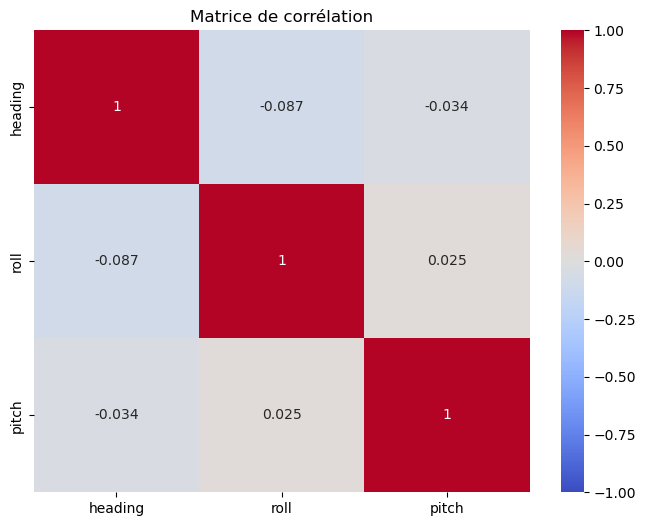

In [5]:

matcorr = df[["heading", "roll", "pitch"]].corr()
print (matcorr)
import seaborn as sns

# Créer le heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    matcorr,
    annot=True,  # Affiche les valeurs dans les cases
    cmap="coolwarm",  # Palette de couleurs
    center=0,  # Centre la palette sur 0
    vmin=-1,  # Valeur minimale de la palette
    vmax=1,   # Valeur maximale de la palette
)
plt.title("Matrice de corrélation")
plt.show()


In [6]:
df.shape

(37542, 7)